# FIT5149 S2 2022
# Assessment 1: Monthly Utility Bill Prediction


Student information
- Family Name: Nguyen
- Given Name: Phuc An
- Student ID: 32406231
- Student email: pngu0043@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- tidyverse
- reshape
- gridExtra
- PerformanceAnalytics
- corrplot
- caret
- Metrics
- broom
- rpart
- rpart.plot
- car
- RColorBrewer

## Table of Contents

1. [Introduction](#sec_1)\
    1.1. [Data description](#sec_1.1)\
    1.2. [Task description](#sec_1.2)
2. [Exploratory Data Analysis](#sec_2)\
    2.1. [Descriptive Statistic](#sec_2.1)\
    2.2. [Data Distribution & Counting](#sec_2.2)\
    2.3. [Data Correlation](#sec_2.3)\
    2.4. [EDA Summary](#sec_2.4)
3. [Methodology](#sec_3)\
    3.1. [Modelling methods](#sec_3.1)\
    3.2. [Model evaluation methods](#sec_3.2)\
    3.3. [Data preparation](#sec_3.3)
4. [Model Development](#sec_4)\
    4.1. [Linear Regression Models](#sec_4.1)\
    4.2. [Nonlinear Models](#sec_4.2)\
    4.3. [Tree-Based Models](#sec_4.3)\
    4.4. [Model Comparison & Evaluation](#sec_4.4)
5. [Results and discussion](#sec_5)\
    5.1. [Prediction Task](#sec_5.1)\
    5.2. [Inference Task](#sec_5.2)\
    5.3. [Discussion](#sec_5.3)
6. [Conclusion](#sec_6)
7. [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

Commercial electricity prices in Australia are rising to a record high. A harsh winter on the east coast and high commodity costs, according to the Australian Energy Market Operator (AEMO), are to blame. Australia is a significant energy supplier globally, this a supply shortage is not the cause of the current issue. Concerns about affordability are at its core. Therefore, knowing the main factors (other than money) that affect electricity bills is an important first step to improving the above problems. Some challenges are found as: 
+ Ignorance and lacking access to modern electricity: For cooking and eating, people mostly use wood, charcoal, or animal waste.
+ Failure to invest in renewable energy will lead to problems with indoor air pollution which is the cause of millions of deaths each year, mainly women and children.
+ The main cause of climate change is energy from fossil fuels, which will account for a high percentage of the greenhouse effect.

Since then, a survey was carried out to understand what factors affect electricity bills (details will be presented in the data description). As a data analyst, my task in this project is to develop a monthly electricity bill estimation model based on the given possible predictors. From there, make inferences that generate detailed information about the relationship between response and predictor variables.

### 1.1. Data description <a class="anchor" id="sec_1.1"></a>

The data consists of 1000 records with 11 columns where the first 10 columns are predictor variables and the column 'amount_paid' is the response variable. Details will be described below:

| Column | Explanation | 
| --- | --- |
| num_rooms |  The number of rooms in the house 
| num_people | The number of people in the house
| housearea | The area of the house
| is_ac | Is there any air conditioner in the house 
| is_TV | Is there any TV in the house
| is_flat | Is it a flat
| avemonthlyincome | average monthly income
| num_children | Total number of children
| is_urban | Is the house located in the urban
| month | Month of the year
| amount_paid | Amount to be paid as a monthly invoice

### 1.2. Task description <a class="anchor" id="sec_1.2"></a>
#### 1.2.1. Prediction Task

In this task, I need to utilise the model(s) I construct, precisely anticipate the monthly electricity cost from the obtained data. Even though the data is clean and I do not need to wrangle them, making sense of these data through the EDA step is indispensable. The data will be divided into training set and testing set with the ratio 8:2. Then I was asked to do:
1. Generating some predictive models, compare the last model I selected and the rest.
2. Describe and justify the choice of my model.
3. Evaluate, analyse and interpret the result.

#### 1.2.2. Inference Task

The task in this part is to explain your predictions, specifically to identify the key factors that have a strong influence on
the monthly electricity bill. In order to obtain effective and rational explanations, I must make inferences based on appropriate data techniques, in particular:
1. Identify attributes that affect response variable with clear evidence.
2. Report the identification by using statistical evidence (e.g. correlation analysis, regression equations, p- values) and interpret the allocation set/defined subset.

### Import libraries

In [1]:
# Remove the warning message
options(warn=-1)

# Add all necessary libraries
library(tidyverse)
library(reshape)
library(gridExtra)
library(PerformanceAnalytics)
library(corrplot)
library(caret)
library(Metrics)
library(broom)
library(rpart)
library(rpart.plot)
library(car)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.6       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date

## 2. Exploratory Data Analysis (EDA) <a class="anchor" id="sec_2"></a>

In this section,  we will focus on exploring data analysis about household and resident information. The analysis is divided into the following sub-sections:
- **Descriptive Statistic**: check if the data is null, check the internal structure, see summary statistics of data.
- **Data Distribution and Counting**: In this part, I mainly use three types of histograms: boxplot, barchart and histogram to represent Data distribution and counting in each attribute as well as Distribution of amount_paid depend on each factor
- **Data Correlation**: draw a correlogram to see the relationship between factors vs response variables.

First of all, reading the data with `read.csv()` method to get the output as a dataframe

In [2]:
# Read csv file
data <- read.csv("./FIT5149_Assessment1.csv")

### 2.1. Descriptive Statistic <a class="anchor" id="sec_2.1"></a>

Let's check the data by using `head()` function to print first 6 records

In [3]:
# Display first 6 rows
head(data)

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
3,3,742.57,1,1,1,4837.97,2,0,1,112.0963
1,5,952.99,0,1,0,17532.40,1,1,1,126.6567
3,1,761.44,1,1,1,11146.22,0,0,1,102.3758
0,5,861.32,1,1,0,6069.54,0,0,1,66.5984
1,8,731.61,0,1,0,8615.05,2,1,1,131.6571
0,5,837.24,0,1,1,12330.91,2,1,1,158.6485


Next, checking whether the data is null or not is also an important step. Using `summarise_all()` combine with `sum()` amd `is.null()` function to summarise the total null values all the variables.

In [4]:
# Check null values from the original data
data %>% summarise_all(funs(sum(is.null(data))))

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
0,0,0,0,0,0,0,0,0,0,0


Using `str()` method to display the internal structure of all column in dataframe (including data types)

In [5]:
# Check the internal structure of data
str(data)

'data.frame':	1000 obs. of  11 variables:
 $ num_rooms         : int  3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : int  3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num  743 953 761 861 732 ...
 $ is_ac             : int  1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : int  1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : int  1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num  4838 17532 11146 6070 8615 ...
 $ num_children      : int  2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : int  0 1 0 0 1 1 1 1 1 1 ...
 $ month             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num  112.1 126.7 102.4 66.6 131.7 ...


Finally, to quickly produce result summaries of the columns (i.e. min, max, mean, median, etc) by using `summary()` function

In [6]:
# Quickly compute summary statistics of data
summary(data)

   num_rooms        num_people       housearea          is_ac      
 Min.   :-1.000   Min.   :-1.000   Min.   : 244.4   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.: 4.000   1st Qu.: 691.0   1st Qu.:0.000  
 Median : 2.000   Median : 5.000   Median : 790.0   Median :0.000  
 Mean   : 1.962   Mean   : 4.897   Mean   : 794.7   Mean   :0.376  
 3rd Qu.: 3.000   3rd Qu.: 6.000   3rd Qu.: 893.0   3rd Qu.:1.000  
 Max.   : 5.000   Max.   :11.000   Max.   :1189.1   Max.   :1.000  
     is_tv          is_flat      ave_monthly_income  num_children  
 Min.   :0.000   Min.   :0.000   Min.   : -788.2    Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.: 9018.4    1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :12371.3    Median :1.000  
 Mean   :0.798   Mean   :0.477   Mean   :12342.5    Mean   :1.078  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:15701.2    3rd Qu.:2.000  
 Max.   :1.000   Max.   :1.000   Max.   :28265.5    Max.   :4.000  
    is_urban         month       amount_paid    

### Observation in Descriptive Statistic: 
Through the analysis of Descriptive Statistic, we can observe the following:
- There are no null or missing values in all columns.
- Dataframe consists of 1000 records.
- Total data has 11 variables in which the first 10 columns are predictor variable and 1 response variable is `amount_paid`.
- There are two data types in the dataframe: `num` and `int`, where the numeric type can be either a decimal number or an integer.
- All the column names are correct in the description of the topic which has been described in detail, so no changes are needed.
- Variables `num_rooms`, `num_people` and `ave_monthly_income` appear negative at min value, we will replace these values after splitting the data set.
- The column `month` is now in integer type, we can analyse it without having to convert to date format.
- The max value of `ave_monthly_income` column is 28265.5 which is quite high compared to mean and median as well as 3rd quartile.

### 2.2. Data Distribution & Counting <a class="anchor" id="sec_2.2"></a>

#### 2.2.1. Data distribution in each attribute using boxplot 

From descriptive statistic, we can see that `ave_monthly_income` values are outstanding compared to other attributes, so it will be clearer to plot the `boxplot` of each column in the dataframe. But first, using `melt()` function to reshape the dataframe to make it easier to plot the boxplot of each attribute.

Using  as id variables


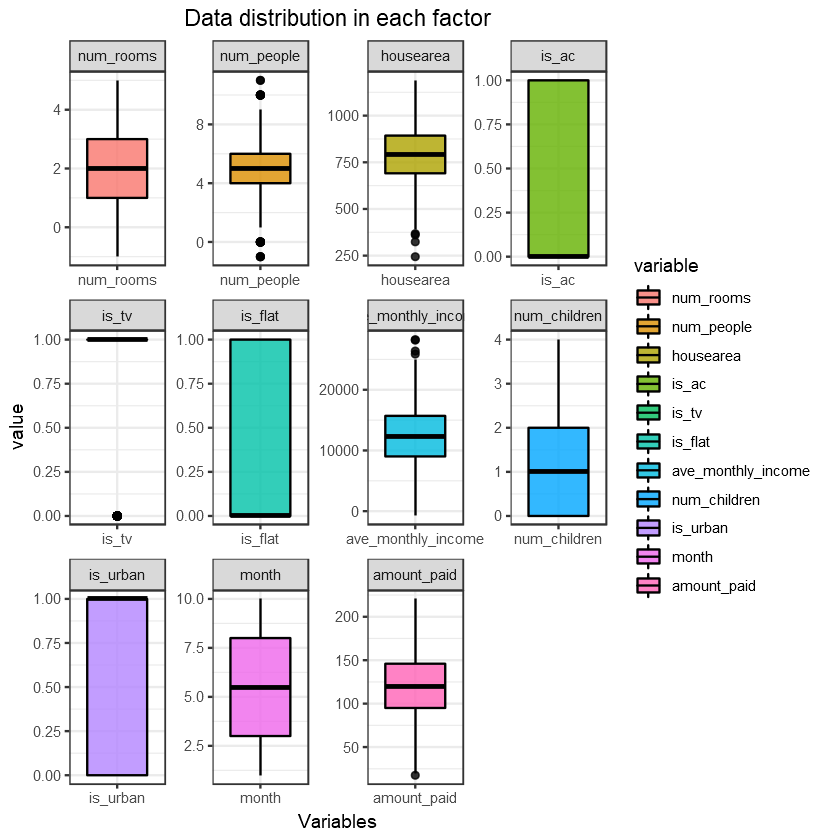

In [7]:
# Reshape the dataframe 
melt_data <- melt(data)

# Plot the boxplot using ggplot() 
ggplot(melt_data, aes(factor(variable), value)) +
     geom_boxplot(alpha = 0.8, color = "black", aes(fill = variable)) + 
     facet_wrap(~variable, scale="free") +
     ggtitle("Data distribution in each factor") +
     xlab("Variables") +
     theme_bw() +
     theme(plot.title = element_text(hjust = 0.5))

**Observation**:
- Columns: `num_people`, `housearea`, `ave_monthly_income` and `amount_paid` have outliers, these outliers will be kept for model training and a model without outliers.
- Columns: `is_ac`, `is_tv`, `is_flat` and `is_urban` have two values, 0 and 1.
- Only the column `is_tv` has 2 values but most of the value is 1.
- Based on the `month` boxplot, there will be 10 months considered in the data.

#### 2.2.2. Data counting in each attribute

We wonder how many different categories are in an attribute, and how much each category will account for in total. For a more intuitive view, let's represent them in graphs, divided into 2 kinds:
- For attributes of type integer, use bar chart to represent
- For attributes of type numeric, use histogram to represent

First, create new dataframes for plotting each factor then using `ggplot()` combine with `geom_bar()` function to draw.

In [8]:
# Create new df for every factor to draw plots
num_rooms <- data %>% select(num_rooms) %>% group_by(num_rooms) %>% summarise(value = n())
num_people <- data %>% select(num_people) %>% group_by(num_people) %>% summarise(value = n())
is_ac <- data %>% select(is_ac) %>% group_by(is_ac) %>% summarise(value = n())
is_tv <- data %>% select(is_tv) %>% group_by(is_tv) %>% summarise(value = n())
is_flat <- data %>% select(is_flat) %>% group_by(is_flat) %>% summarise(value = n())
num_children <- data %>% select(num_children) %>% group_by(num_children) %>% summarise(value = n())
is_urban <- data %>% select(is_urban) %>% group_by(is_urban) %>% summarise(value = n())
month <- data %>% select(month) %>% group_by(month) %>% summarise(value = n())

In [9]:
room_barchart <- ggplot(num_rooms, aes(x = num_rooms, y = value)) +
                 geom_bar(stat = "identity", aes(fill = value)) +
                 scale_fill_gradient('n', low = 'skyblue', high = 'dodgerblue3') +
                 theme_bw() +
                 labs(title = "Count per num_rooms", y = "") +
                 theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11)) 

people_barchart <- ggplot(num_people, aes(x = num_people, y = value)) +
                   geom_bar(stat = "identity", aes(fill = value)) +
                   scale_fill_gradient('n', low = 'lightpink', high = 'firebrick2') +
                   theme_bw() +
                   labs(title = "Count per num_people", y = "") +
                   theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11)) 
is_ac_barchart <- ggplot(is_ac, aes(x = is_ac, y = value)) +
                  geom_bar(stat = "identity", aes(fill = value)) +
                  scale_fill_gradient('n', low = 'lightgreen', high = 'green4') +
                  theme_bw() +
                  labs(title = "Count per AC", y = "") +
                  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11)) 

is_tv_barchart <- ggplot(is_tv, aes(x = is_tv, y = value)) +
                  geom_bar(stat = "identity", aes(fill = value)) +
                  scale_fill_gradient('n', low = 'skyblue', high = 'dodgerblue3') +
                  theme_bw() +
                  labs(title = "Count per TV", y = "") +
                  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11))

is_flat_barchart <- ggplot(is_flat, aes(x = is_flat, y = value)) +
                    geom_bar(stat = "identity", aes(fill = value)) +
                    scale_fill_gradient('n', low = 'lightpink', high = 'firebrick2') +
                    theme_bw() +
                    labs(title = "Count per num_flat", y = "") +
                    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11))

num_children_barchart <- ggplot(num_children, aes(x = num_children, y = value)) +
                         geom_bar(stat = "identity", aes(fill = value)) +
                         scale_fill_gradient('n', low = 'lightgreen', high = 'green4') +
                         theme_bw() +
                         labs(title = "Count per num_children", y = "") +
                         theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11))

is_urban_barchart <- ggplot(is_urban, aes(x = is_urban, y = value)) +
                     geom_bar(stat = "identity", aes(fill = value)) +
                     scale_fill_gradient('n', low = 'skyblue', high = 'dodgerblue3') +
                     theme_bw() +
                     labs(title = "Count per urban", y = "") +
                     theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11))

month_barchart <- ggplot(month, aes(x = month, y = value)) +
                  geom_bar(stat = "identity", aes(fill = value)) +
                  scale_fill_gradient('n', low = 'lightpink', high = 'firebrick2') +
                  theme_bw() +
                  labs(title = "Count per month", y = "") +
                  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11)) +
                  scale_x_continuous(breaks = c(1:10))


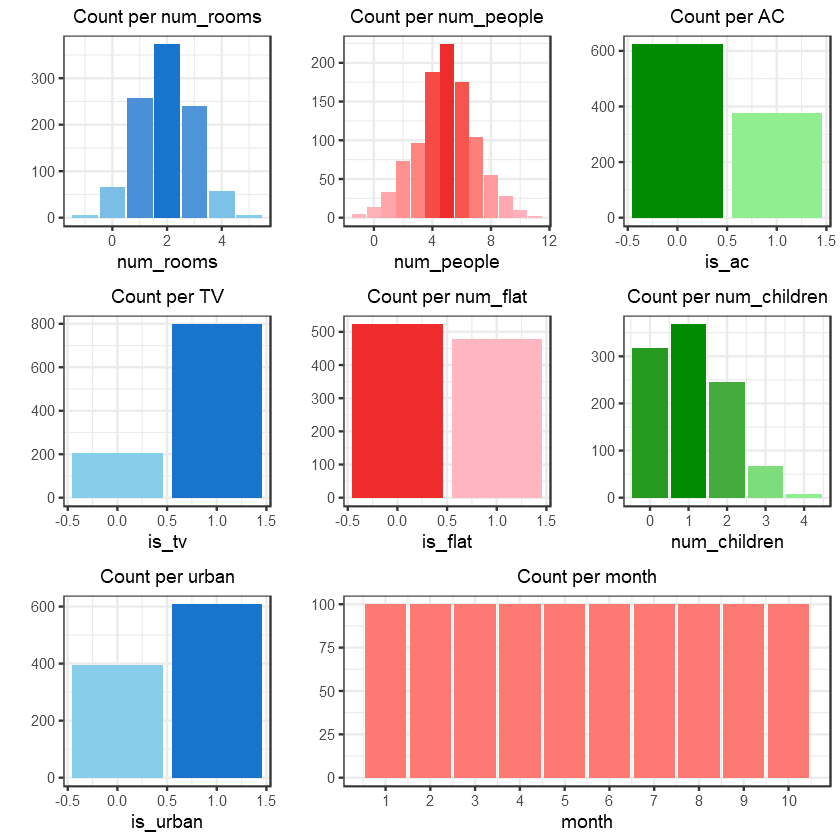

In [10]:
# Using 'grid.arrange()' method to arrange the order of the charts
grid.arrange(room_barchart, people_barchart, is_ac_barchart, is_tv_barchart, 
             is_flat_barchart, num_children_barchart, is_urban_barchart, month_barchart,
             ncol = 3, nrow = 3, layout_matrix = rbind(c(1,2,3), c(4,5,6), c(7,8,8)))

**Observation**:
- The most recorded number of rooms is 2 rooms in the house.
- The number of people in the house has the highest percentage of 5 people and the highest proportion of children recorded is one child in each family.
- The number of records not using AC in the house is almost 2 times higher than that of the house with AC.
- The ratio of the 2 factors that can be seen most clearly from the graph is `is_tv` with a ratio of 1:4 (approximately 200 for no TV and around 800 for having TV) and `is_urban` with a ratio of 2:3 (nearly 400 for no in Urban and about 600 for in Urban).
- The ratio between accommodation is a flat and is not a flat is not too different.
- The number of records of each `month` are equal.

Similar to the factors above, using `ggplot()` in combination with `geom_histogram()` and `geom_density()` function to plot a histogram representing the density in each attribute.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


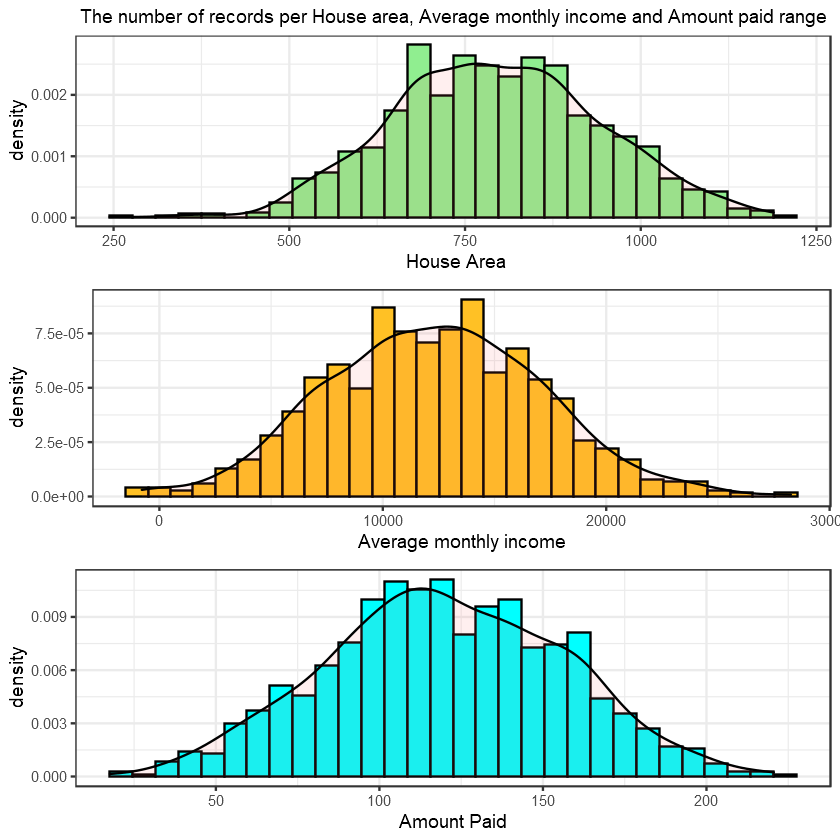

In [11]:
housearea_hist <- ggplot(data, aes(x=housearea)) + 
                  geom_histogram(aes(y=..density..), colour="black", fill="lightgreen") +
                  geom_density(alpha=.1, fill="#FF6666") +
                  theme_bw() +
                  labs(title = "The number of records per House area, Average monthly income and Amount paid range",
                       x = " House Area") +
                  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 11))

ave_monthly_income_hist <- ggplot(data, aes(x=ave_monthly_income)) + 
                           geom_histogram(aes(y=..density..), colour="black", fill="goldenrod1") +
                           geom_density(alpha=.1, fill="#FF6666") +
                           theme_bw() +
                           labs(x = "Average monthly income")

amount_paid_hist <- ggplot(data, aes(x=amount_paid)) + 
                    geom_histogram(aes(y=..density..), colour="black", fill="cyan") +
                    geom_density(alpha=.1, fill="#FF6666") +
                    theme_bw() +
                    labs(x = "Amount Paid")

# Using 'grid.arrange()' method to arrange the order of the charts
grid.arrange(housearea_hist, ave_monthly_income_hist, amount_paid_hist, nrow = 3)

**Observation**:
- According to the plot, there are more homes with an area between 680 and 850 square feet than with less than 500 square feet.
- The average monthly income is often between 10,000 and 20,000, while there are a few homes that report incomes as high as 30,000.
- Amounts paid each month often fall between 100 and 150.

#### 2.2.3. Distribution of `amount_paid` depend on each factor

Now, we want to see that the response variable `amount_paid` is compared for each catergory in a factor. First, create new dataframes with each factor vs `amount_paid` for graphing

In [12]:
paid_per_room <- data %>% select(num_rooms, amount_paid)
paid_per_people <- data %>% select(num_people, amount_paid)
paid_per_ac <- data %>% select(is_ac, amount_paid) 
paid_per_tv <- data %>% select(is_tv, amount_paid)
paid_per_flat <- data %>% select(is_flat, amount_paid)
paid_per_child <- data %>% select(num_children, amount_paid)
paid_per_urban <- data %>% select(is_urban, amount_paid)
paid_per_month <- data %>% select(month, amount_paid)

Using `ggplot()` and `geom_boxplot()` function to draw the chart

In [13]:
f1 <- ggplot(paid_per_room, aes(x = num_rooms, y = amount_paid, group = num_rooms)) + 
      geom_boxplot(color="black", fill="red", alpha=0.8) + 
      theme_bw() +
      labs(title = "Amount paid per no_rooms", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f2 <- ggplot(paid_per_people, aes(x = num_people, y = amount_paid, group = num_people)) + 
      geom_boxplot(color="black", fill="orange", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per no_people", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f3 <- ggplot(paid_per_ac, aes(x = is_ac, y = amount_paid, group = is_ac)) + 
      geom_boxplot(color="black", fill="gold1", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per is_AC", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f4 <- ggplot(paid_per_tv, aes(x = is_tv, y = amount_paid, group = is_tv)) + 
      geom_boxplot(color="black", fill="deepskyblue", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per is_TV", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f5 <- ggplot(paid_per_flat, aes(x = is_flat, y = amount_paid, group = is_flat)) + 
      geom_boxplot(color="black", fill="yellowgreen", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per is_flat", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f6 <- ggplot(paid_per_child, aes(x = num_children, y = amount_paid, group = num_children)) + 
      geom_boxplot(color="black", fill="mediumpurple", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per no_children", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f7 <- ggplot(paid_per_urban, aes(x = is_urban, y = amount_paid, group = is_urban)) + 
      geom_boxplot(color="black", fill="deeppink", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per is_urban", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

f8 <- ggplot(paid_per_month, aes(x = month, y = amount_paid, group = month)) + 
      geom_boxplot(color="black", fill="cyan1", alpha=0.8) +
      theme_bw() +
      labs(title = "Amount paid per month", y = "") +
      theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10))

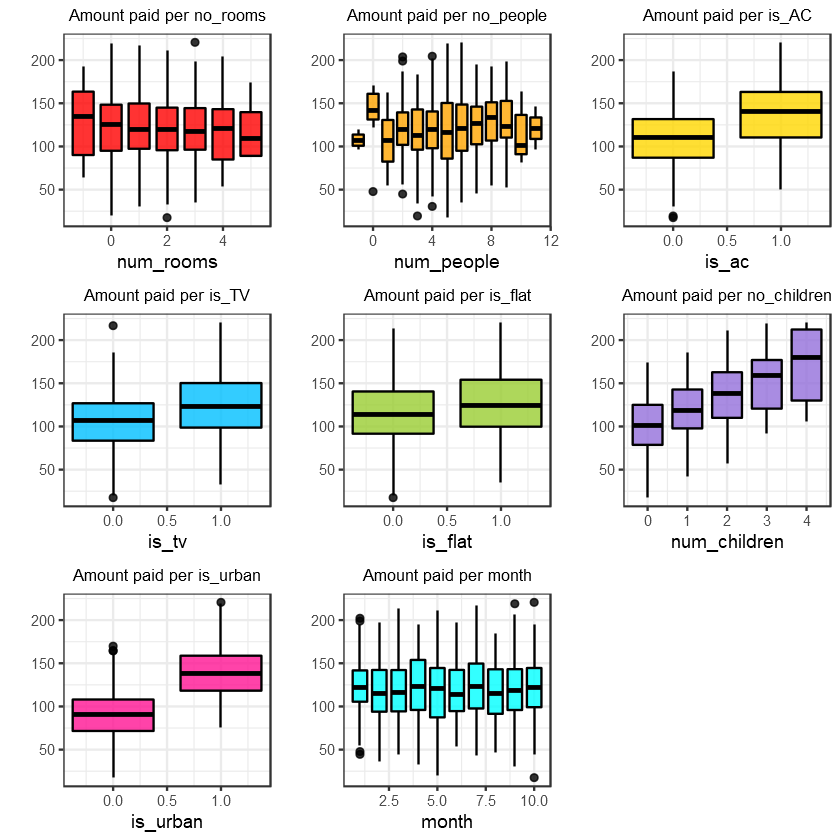

In [14]:
# Using 'grid.arrange()' method to arrange the order of the charts
grid.arrange(f1, f2, f3, f4, f5, f6, f7, f8,
             ncol = 3, nrow = 3)

**Observation**:
- For factors with only 2 values yes or no, namely: `is_ac`, `is_tv`, `is_flat` and `is_urban`, we can see if the house has AC, TV or accommodation it is a flat or the location of urban housing, the amount to be paid is higher for homes that do not have the above conditions.
- The distribution of the payable amount in the columns `num_rooms`, `num_people` and `month` is not much different. This also shows that the factors do not affect the response variable much.
- It is noticeable that the `num_children` column shows the difference if there are more children in the house, the higher the payout will be.

### 2.3. Data Correlation<a class="anchor" id="sec_2.3"></a>

To clarify the statements from the above analysis, use the correlation method to show the linear relationship between the two predictor and response variables. Using `chart.Correlation()` function with Pearson methods to plot the correlation graph. Its range of values is from -1 to 1, where -1 denotes a completely negative linear correlation, 0 denotes no relation, and 1 denotes a completely positive correlation.

We have:

| Pearson correlation coefficient | Interpretation
| --- | --- |  
| Greater than 0.5 to 1 (or -0.5 to -1)|  Strong positive (negative) correlation 
| Between 0.3 and 0.5 (or -0.3 and -0.5)| Moderate positive (negative) correlation
| Between 0 and 0.3 (or 0 and –0.3)| Weak positive (negative) correlation
| 0 | No correlation

and:

| Signif. level | Code 
| --- | --- |
| 0.001 | ***  
| 0.01 | ** 
| 0.05 | * 
| 0.1 | **.**
| 1 | 

First, check the numerical correlation in the data using the `cor()` function

In [15]:
round(cor(data),3)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
num_rooms,1.000,-0.006,-0.034,0.019,-0.016,0.004,0.000,-0.037,-0.016,0.024,-0.024
num_people,-0.006,1.000,0.000,0.034,0.020,0.012,0.019,-0.011,-0.024,-0.031,0.054
housearea,-0.034,0.000,1.000,0.036,0.088,0.008,-0.043,0.039,0.025,0.066,0.096
is_ac,0.019,0.034,0.036,1.000,0.000,0.003,-0.014,-0.027,-0.053,0.002,0.390
is_tv,-0.016,0.020,0.088,0.000,1.000,-0.028,0.014,0.015,0.035,-0.050,0.198
is_flat,0.004,0.012,0.008,0.003,-0.028,1.000,-0.015,-0.028,0.000,-0.040,0.148
ave_monthly_income,0.000,0.019,-0.043,-0.014,0.014,-0.015,1.000,0.008,-0.039,-0.009,0.026
num_children,-0.037,-0.011,0.039,-0.027,0.015,-0.028,0.008,1.000,-0.008,0.007,0.448
is_urban,-0.016,-0.024,0.025,-0.053,0.035,0.000,-0.039,-0.008,1.000,-0.004,0.650
month,0.024,-0.031,0.066,0.002,-0.050,-0.040,-0.009,0.007,-0.004,1.000,-0.001


Now, using `chart.Correlation()` method to plot matrix with upper side is numerical value combined with their size to show the magnitude of the correlation while the bottom is the bivariate scatterplots, with a fitted line.

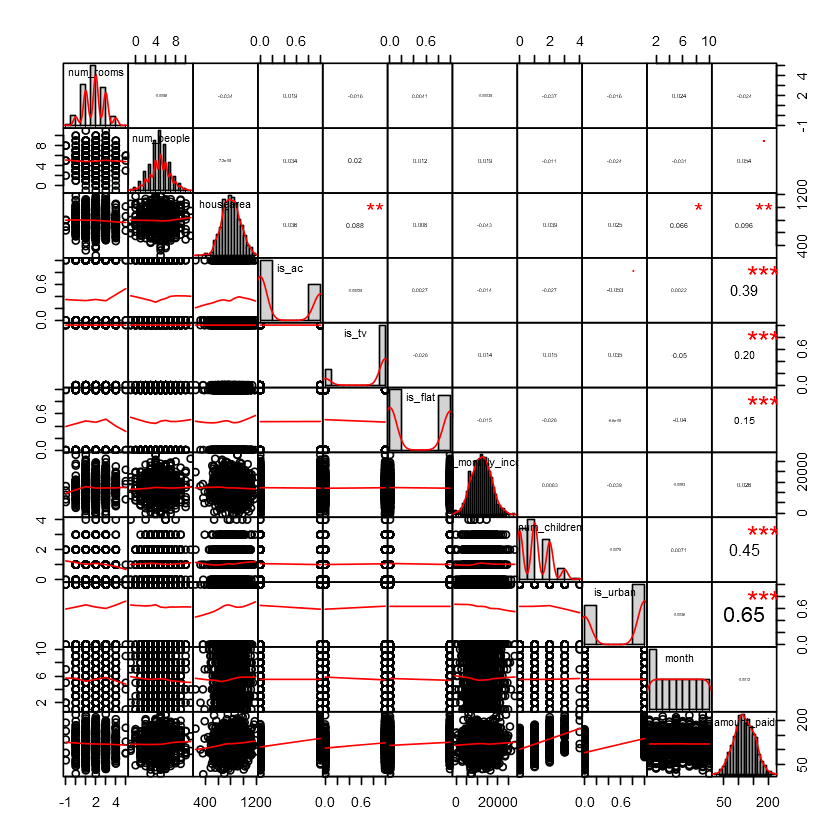

In [16]:
# Plot the correlation graph
chart.Correlation(data, histogram = TRUE, method = "pearson")

Using color and size is more intuitive for the viewer, let's redraw the correlation with a new histogram

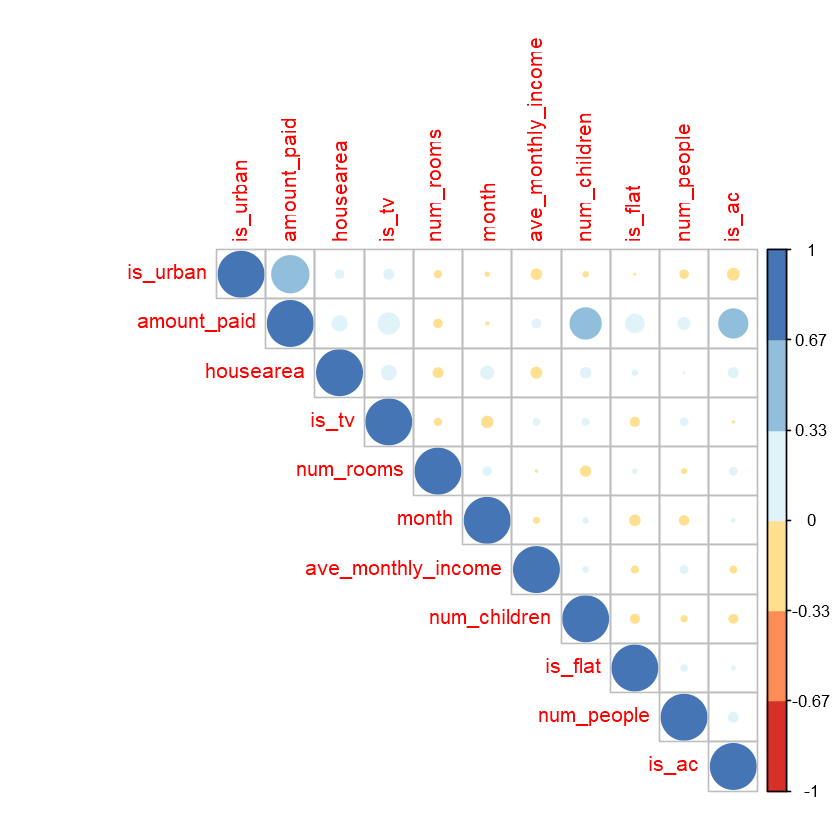

In [17]:
# Plot the correlogram with palette of colors 
library(RColorBrewer)
corrplot(cor(data), type="upper", order="hclust",
         col=brewer.pal(n=6, name="RdYlBu"))

**Observation**: From the two correlograms above we can see that:
- Variable `is_urban` has Strong positive correlation with response variable `amount_paid` with coefficient is 0.65.
- Next, the two variables `is_ac` and `num_children` have Moderate positive correlation with coefficients of 0.39 and 0.45, respectively.
- Furthermore, `is_tv` and `is_flat` are two variables with Weak positive correlation with only 0.2 and 0.15, respectively.
- Finally, the remain variables have a positive but very small correlation (except for the variable `num_rooms` with small negative correlation) and `month` can be considered as no correlation with the response variable `amount_paid`.

### 2.4. EDA Summary <a class="anchor" id="sec_2.4"></a>

In this section, I had a better insight into the data set and at the same time provided specific results for the selection and creation of suitable models for this data. Important discoveries found in this section include:
- Dataset includes 1000 rows and 11 factors with no null value.
- All data types in data are int and num.
- Use boxplot to see the division of attributes in each factor.
- Use barcharts and histograms to see the number of categories in each factor.
- Representing the relationship / impact of response variable with each factor through boxplot.
- List of all important factors through data from correlation.
- Assumptions and conclusions for using this type of model to develop.

## 3. Methodology <a class="anchor" id="sec_3"></a>

After analyzing and exploring, we have a deeper look at the data, see the relationship between them. In this section, we will present methods to build models suitable for data as well as methods for model evaluation. The last part is to prepare the necessary data and supporting functions during model development.

### 3.1. Modelling methods <a class="anchor" id="sec_3.1"></a>

**1)** The purpose of the Prediction Task is to predict the monthly electricity bill using 10 predictors, so the regression problem will be used. In addition, this task also analyzes the relationship between the predictor and the response variable, thereby determining which attribute most affects the response variable. Thus, there will be three groups of models that will be developed with 7 models built, including:
- Linear Regression models (with 4 models)
- Nonlinear models (with 1 model)
- Tree-based models (with 2 models)

**Note:** Before training model, we will replace data anomalies with median of the column, including:
- Negative and zero values in `num_rooms` column because a house must have at least one room.
- Negative and zero values in `num_people` column because a house must have at least one person.
- Negative values in `ave_monthly_income` column.

After building these 7 models, the evaluation will be performed and compared between the models, thereby choosing the best model for the final prediction.

**2)** The purpose of the Inference Task is to find a group or subgroup of factors that significantly affect the response variable, and to provide statistical evidence (e.g. correlations, p- values) and explain why these attributes have certain effects on the prediction.

### 3.2. Model evaluation methods <a class="anchor" id="sec_3.2"></a>

Data science places a lot of importance on model evaluation. It makes it simple for you to communicate your model to others and lets you see how well your model is performing and how closely your forecast matches the actual value. There are several evaluation metrics available, but only a few of them can be employed with regression. The various regression model metrics will be covered in this part, they include:

- **R Square ($R^{2}$)**: A higher R Square value denotes a better match between the forecast and the actual value, which ranges from 0 to 1.

$$ R^{2} = 1 - \frac{SS_{Regression}}{SS_{Total}} =  1 - \frac{\sum_i{(y_{i} - \hat{y_{i}})^2}}{\sum_i{(y_{i} - \bar{y_{i}})^2}} $$


- **Mean Squared Error (MSE)**:

$$ MSE = \frac{1}{N} \sum^{N}_{i=1}{(y_{i} - \hat{y_{i}})^2} $$


- **Root Mean Squared Error (RMSE)**:

$$ RMSE = \sqrt{\frac{1}{N} \sum^{N}_{i=1}{(y_{i} - \hat{y_{i}})^2}} $$


- **Mean Absolute Error (MAE)**:

$$ MAE = \frac{1}{N} \sum^{N}_{i=1}{|y_{i} - \hat{y_{i}}|} $$


Note that for MSE, RMSE and MAE, the smaller the error, the better the model.

Create a function to evaluate trained models with the following steps:
- Input is model, test data and test label.
- Predict results based on model and test data.
- Use error functions based on test labels and predicted variable above.
- Return a list of criteria to evaluate.

In [18]:
evaluation <- function(model, test.data, test.label){
    
    # Predict results based on model and test data
    prediction = predict(model, newdata = test.data)
    
    # Use error functions based on test labels and predicted variable
    rss <- sum((prediction - test.label) ^ 2)  ## residual sum of squares
    tss <- sum((test.label - mean(test.label)) ^ 2)  ## total sum of squares
    RSquare <- 1 - rss/tss

    MSE <- round(mse(test.label, prediction),7) 
    RMSE <- round(rmse(test.label, prediction),7) 
    MAE <- round(mae(test.label, prediction),7)
    
    # Return a list of criteria to evaluate
    return (c(RSquare, MSE, RMSE, MAE))
}

### 3.3. Data preparation <a class="anchor" id="sec_3.3"></a>

There are a total of three things that need to be calibrated before performing the steps below, namely, dividing the data set, building a function to plot the relationship between the predicted value and the actual value, and a function to set the number of folds when using cross validation for each model, because they will be used many times with many different models.

First, splitting the clean data into the training set (from record 1 to 800 for training and validation) and testing set (from record 801 to 1000). Then, replacing the data anomalies with median of that column.

In [19]:
# Set index and split data into train.set and test.set
index = 1:800
train.set <- data[index, ]
test.set <- data[-index,]

# Set the data anomalies with NA in both train.set and test.set
train.set[train.set$num_rooms <= 0, 'num_rooms'] <- NA
train.set[train.set$num_people <= 0, 'num_people'] <- NA 
train.set[train.set$ave_monthly_income < 0, 'ave_monthly_income'] <- NA

test.set[test.set$num_rooms <= 0, 'num_rooms'] <- NA
test.set[test.set$num_people <= 0, 'num_people'] <- NA
test.set[test.set$ave_monthly_income < 0, 'ave_monthly_income'] <- NA

# Replace the NA with median of that column
train.set$num_rooms[is.na(train.set$num_rooms)] <- median(train.set$num_rooms, na.rm = TRUE)
train.set$num_people[is.na(train.set$num_people)] <- median(train.set$num_people, na.rm = TRUE)
train.set$ave_monthly_income[is.na(train.set$ave_monthly_income)] <- median(train.set$ave_monthly_income, na.rm = TRUE)

test.set$num_rooms[is.na(test.set$num_rooms)] <- median(test.set$num_rooms, na.rm = TRUE)
test.set$num_people[is.na(test.set$num_people)] <- median(test.set$num_people, na.rm = TRUE)
test.set$ave_monthly_income[is.na(test.set$ave_monthly_income)] <- median(test.set$ave_monthly_income, na.rm = TRUE)

Split the train.set and test.set into data (10 first columns) and label (last column) 

In [20]:
# Split train.set into data and label 
train.data <- train.set[, -11]
train.label <- as.matrix(train.set[, 11])

# Split test.set into data and label
test.data <- test.set[, -11]
test.label <- as.matrix(test.set[, 11])

Building Predicted vs. Observed plot function

In [21]:
plot_actual_pred <- function(model, train.label, test.data, test.label, color, name){
    
    # Predict results based on model and test data
    prediction = predict(model, newdata = test.data)
    
    # Make a dataframe with x-axis is Actual value and y-axis is Predicted value
    # then using ggplot() to draw the plot
    data.frame(Actual = test.label, Predicted = prediction) %>%
    ggplot(aes(x = Actual, y = Predicted)) +
       geom_point(alpha = 0.6, color = color) +
       geom_smooth(method = "loess", formula = "y ~ x") +
       geom_abline(intercept = 0, slope = 1, linetype = 2) +
       theme_bw() +
       labs(title = name) +
       theme(plot.title = element_text(hjust = 0.5, size = 10))
}

Let's define the **10-fold Cross Validation** use for all models

In [22]:
set.seed(123)
cv <- trainControl(
  method = "cv",
  number = 10,
)

## 4. Model Development <a class="anchor" id="sec_4"></a>

In this section, some models will be built by using package `caret` which helps in building Machine Learning models, with each model being given an observation along with graphs representing the data. A total of 7 models are built with the following structure:
- Linear Regression models:
    - Multiple Linear Regression Model
    - Multiple Linear Regression Model without outliers
    - Ridge Regression Model
    - Lasso Regression Model
- Nonlinear models:
    - Polynomial Model
- Tree-based models:
    - Decision Tree Regression Model
    - Boosted Regression Tree Model

Finally, these predictive models will be compared together through the evaluation of the error function mentioned in section 3.2 to choose the final model that gives the final prediction result.

### 4.1. Linear Regression models <a class="anchor" id="sec_4.1"></a>

The linear regression model takes the form: 

$$ Y = β_0 + β_1 x_1 + β_2 x_2 + · · · + β_p x_p + ϵ $$

where $x_i$ represents the $i^{th}$ predictor, $β_i$ represents the model coefficients and $ϵ$ is an error term.

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.1.1. Multiple Linear Regression model </strong></div>

First of all, let's train the model with all predictors

In [23]:
MLR_model <- lm(amount_paid ~ ., data = train.set)
summary(MLR_model)


Call:
lm(formula = amount_paid ~ ., data = train.set)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.3485 -10.7555   0.0493   9.8044  25.3860 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.627e+01  3.472e+00   7.566 1.07e-13 ***
num_rooms          -2.230e-01  5.079e-01  -0.439 0.660723    
num_people          9.719e-01  2.323e-01   4.184 3.19e-05 ***
housearea           5.372e-03  3.035e-03   1.770 0.077058 .  
is_ac               3.346e+01  9.198e-01  36.377  < 2e-16 ***
is_tv               1.459e+01  1.121e+00  13.008  < 2e-16 ***
is_flat             1.143e+01  8.902e-01  12.838  < 2e-16 ***
ave_monthly_income  3.600e-04  9.558e-05   3.766 0.000178 ***
num_children        1.806e+01  4.801e-01  37.627  < 2e-16 ***
is_urban            5.029e+01  9.144e-01  54.994  < 2e-16 ***
month               2.015e-01  1.947e-01   1.035 0.301006    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stand

**Observation**: We observe that the result has a linear model that:
-  We would like the median value to be centred around 0 because this would indicate that our residuals were relatively symmetrical and that our model was making equally good predictions at both the high and low ends of our dataset. And in the results here, the median is 0.0493, which is very close to 0. The score between max and min is symmetrical, in other words, the model will predict well at both high and low `amount_paid` range in the dataset.
- For Cofficients: the p-values demonstrate that there is no statistically significant correlation between the number of rooms and the amount paid or the month and the amount paid. Other factors have p-value below 0.05 is considered as significant.
- Another way to assess how well our model fits the data is to look at the Multiple R-squared/ Adjust R-squared value, which shows us what proportion of the variance in our dependent variable that the independent variable is explaining. In this case, this number is 0.8809 can be considered high.
- We can establish the outcome of this test with the use of the F-statistic and overall p-value. Depending on how many variables are in your test, just looking at the F-statistic might be a bit deceptive. It is typical for an F-statistic to be near to 1 and yet give a p-value where we would reject the null hypothesis when there are many independent variables.

The `step()` method will assist us in this effort rather than manually choosing a selection of variables that are closely connected with the predictor.

In [24]:
MLR_step <- step(MLR_model)

Start:  AIC=4056.81
amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban + 
    month

                     Df Sum of Sq    RSS    AIC
- num_rooms           1        30 124041 4055.0
- month               1       168 124179 4055.9
<none>                            124011 4056.8
- housearea           1       493 124503 4058.0
- ave_monthly_income  1      2229 126240 4069.1
- num_people          1      2751 126762 4072.4
- is_flat             1     25904 149915 4206.6
- is_tv               1     26595 150606 4210.2
- is_ac               1    207992 332003 4842.6
- num_children        1    222528 346539 4876.9
- is_urban            1    475358 599369 5315.2

Step:  AIC=4055.01
amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + 
    ave_monthly_income + num_children + is_urban + month

                     Df Sum of Sq    RSS    AIC
- month               1       164 124205 4054.1
<none>                 

In [25]:
summary(MLR_step)


Call:
lm(formula = amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, data = train.set)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.3800 -10.5700   0.2383  10.0387  24.8096 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.659e+01  3.152e+00   8.435  < 2e-16 ***
num_people         9.644e-01  2.320e-01   4.158 3.56e-05 ***
housearea          5.634e-03  3.024e-03   1.863 0.062837 .  
is_ac              3.344e+01  9.186e-01  36.399  < 2e-16 ***
is_tv              1.452e+01  1.117e+00  13.000  < 2e-16 ***
is_flat            1.140e+01  8.888e-01  12.828  < 2e-16 ***
ave_monthly_income 3.615e-04  9.536e-05   3.791 0.000162 ***
num_children       1.806e+01  4.796e-01  37.668  < 2e-16 ***
is_urban           5.031e+01  9.138e-01  55.051  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.53 on 791 degrees of 

**Observation**: The summarie: one from the whole model (`MLR_model`) and the other without `num_rooms` and `month` (`MLR_step`) can be compared. The adjust R-Sqruared has a little bit higher but overall both models is not much differnece. In other words, eliminating the two variables simplifies the model while maintaining a high level of modelling accuracy.

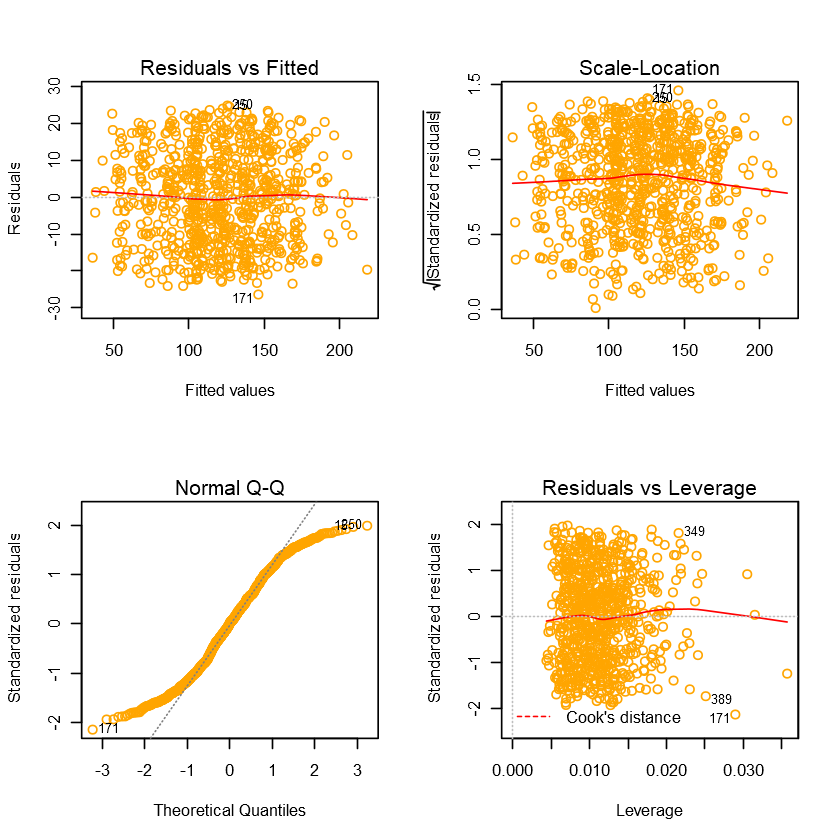

In [26]:
par(mfcol = c(2,2))
plot(MLR_step, col = 'orange')

**Observation:**
- <u>For Residuals vs Fitted</u>: This plot indicates whether the residuals exhibit a nonlinear pattern. An even distribution of residuals without a clear pattern around the horizontal line indicates a linear relationship. However, if the relationship between the predictor variables and the response is nonlinear, this plot can show obvious patterns if the model fails to capture the nonlinearity. In this case, we can see that the datapoints, although spread out from the linear line, have a fairly large concentration in the central region, shows that there could be a non-linear relationship between `amount_paid` and all the predictors.
- <u>For Scale-Location</u>: Used to test the equal variance assumption by showing whether the residuals are evenly distributed over the ranges of the predictors. It's nice when we can see a horizontal line with evenly spaced dots (randomly). The scale and location plot shows that the residuals appear randomly distributed.
- <u>For Normal Q-Q</u>: it is a graphical tool used to determine if a collection of data might have reasonably come from a theoretical distribution like the Normal distribution. When doing a linear regression analysis, we presum that the residual is normally distributed, has a mean of zero, and a constant variance. If residuals are regularly distributed, it may be seen on the conventional Q-Q plot. Remainings should be neatly aligned on the dashed straight line. In this case, the data points are concentrated in the range -1 to 1, beyond this range, they are increasing and deviating from the dashed line.

Take a closer look in the Residuals vs Leverage plot by using `influencePlot()` method below

,StudRes,Hat,CookD
171,-2.14118709,0.028946619,1.511673e-02
250,1.99069989,0.007137456,3.153549e-03
327,0.03892909,0.031478925,5.479807e-06
364,-1.24435935,0.035686769,6.362638e-03
389,-1.73868348,0.025099417,8.625664e-03


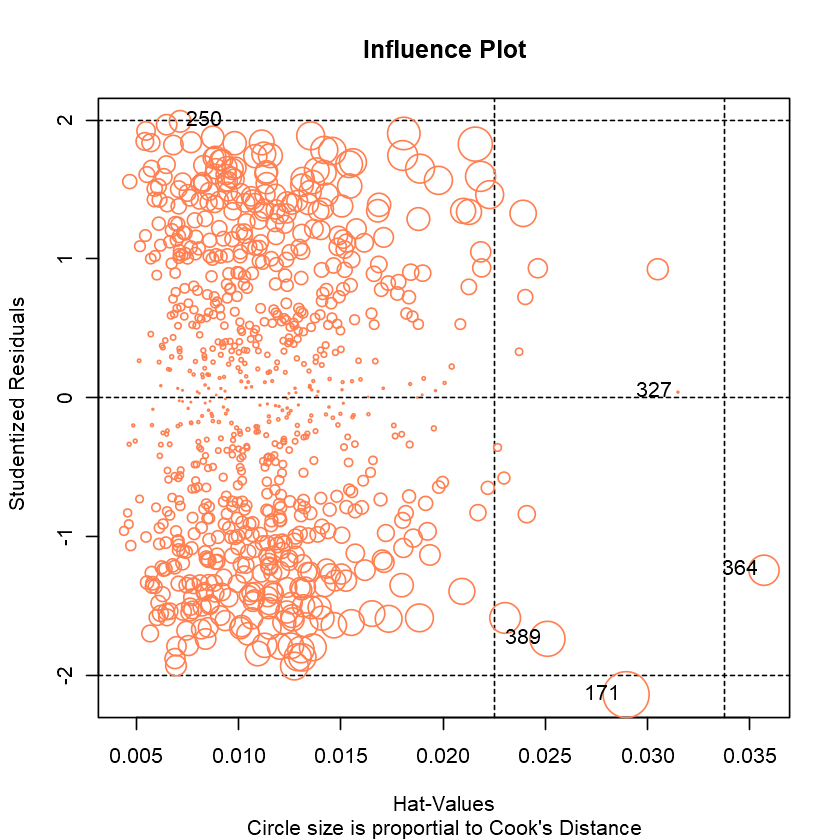

In [27]:
influencePlot(MLR_step, scale=5, 
              id.method="noteworthy", 
              main = "Influence Plot", 
              sub = "Circle size is proportial to Cook's Distance",
              col = "coral")

**Observation:** The graphic displays the residual on the vertical axis, leverage on the horizontal axis, and the point size, which represents the effect of the point, as the square root of Cook's D statistic.

- The observable outliers are datapoints larger than about -2 and 2, we can see the outliers are very few and do not have much effect compared to the overall.
- The potential for a case to have an impact on the model is known as leverage. High leverage points are those that are farthest to the right (i.e. datapoint 364). If a point fits the broader model without that situation, it may not have much of an impact on the model.
- To determine how the parameter estimations would vary if the case were removed, influence combines the leverage and residual of the case. The biggest sway is exerted by points with high leverage and significant residuals. If they are altered or eliminated, the model may suffer (be perturbed), becoming less reliable.

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.1.2. Multiple Linear Regression model without outliers </strong></div>

To implement this model, first remove the outliers in the training set by creating a function to detect and remove outliers and apply them to the columns containing the outliers explored above.

In [28]:
# Copy a training set into new dataframe
train.set.no.outlier <- data.frame(train.set)

In [29]:
# Function to detect the outlier using Interquatile rule
detect_outliers <- function(outlier) {

    Q1 <- quantile(outlier, probs=.25)
    Q3 <- quantile(outlier, probs=.75)
    IQR = Q3-Q1

    upper_inner_fence = Q3 + (IQR * 1.5)
    lower_inner_fence = Q1 - (IQR * 1.5)

    outlier > upper_inner_fence | outlier < lower_inner_fence
}

# Function to remove outlier from the dataframe
remove_outliers <- function(df, cols = names(df)) {
    for (i in cols) {
        df <- df[!detect_outliers(df[[i]]),]
    }
    df
}

In [30]:
# Get the new training set without outlier
train.set.no.outlier <- remove_outliers(train.set.no.outlier, c('num_people', 'housearea','ave_monthly_income', 'amount_paid'))

Training the model using `lm()` method

In [31]:
# Train the model without outlier and then using step() to optimize the model
MLR_no_outlier <- lm(amount_paid ~ ., data = train.set.no.outlier)
MLR_no_outlier <- step(MLR_no_outlier)

Start:  AIC=3953.61
amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban + 
    month

                     Df Sum of Sq    RSS    AIC
- num_rooms           1        53 120602 3951.9
- month               1       236 120785 3953.1
<none>                            120549 3953.6
- housearea           1       409 120959 3954.3
- ave_monthly_income  1      2061 122611 3964.8
- num_people          1      2836 123385 3969.7
- is_flat             1     24429 144978 4095.5
- is_tv               1     26199 146748 4105.0
- is_ac               1    203356 323905 4722.6
- num_children        1    219203 339753 4759.8
- is_urban            1    466002 586551 5185.7

Step:  AIC=3951.95
amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + 
    ave_monthly_income + num_children + is_urban + month

                     Df Sum of Sq    RSS    AIC
- month               1       229 120831 3951.4
<none>                 

In [32]:
summary(MLR_no_outlier)


Call:
lm(formula = amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, data = train.set.no.outlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.4534 -10.5461   0.3118   9.8845  24.6921 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.617e+01  3.267e+00   8.008 4.29e-15 ***
num_people         1.022e+00  2.430e-01   4.206 2.91e-05 ***
housearea          5.526e-03  3.181e-03   1.737 0.082764 .  
is_ac              3.351e+01  9.304e-01  36.022  < 2e-16 ***
is_tv              1.469e+01  1.138e+00  12.909  < 2e-16 ***
is_flat            1.121e+01  8.991e-01  12.465  < 2e-16 ***
ave_monthly_income 3.611e-04  9.890e-05   3.652 0.000278 ***
num_children       1.813e+01  4.846e-01  37.401  < 2e-16 ***
is_urban           5.044e+01  9.244e-01  54.563  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.52 on 771 

**Observation:** When compared with the model with outliers, Multiple R-squared and Adjust R-squared have slightly increased, from 0.8808 to 0.8815 and from 0.8796 to 0.8802, respectively, however, this number is not large so these outliers are small in number and has little effect on the final result.

,StudRes,Hat,CookD
171,-2.1500360,0.029526759,0.015554117
250,1.9836119,0.007507614,0.003294547
389,-1.7603851,0.026543441,0.009363384
676,0.9165575,0.032598775,0.003146021


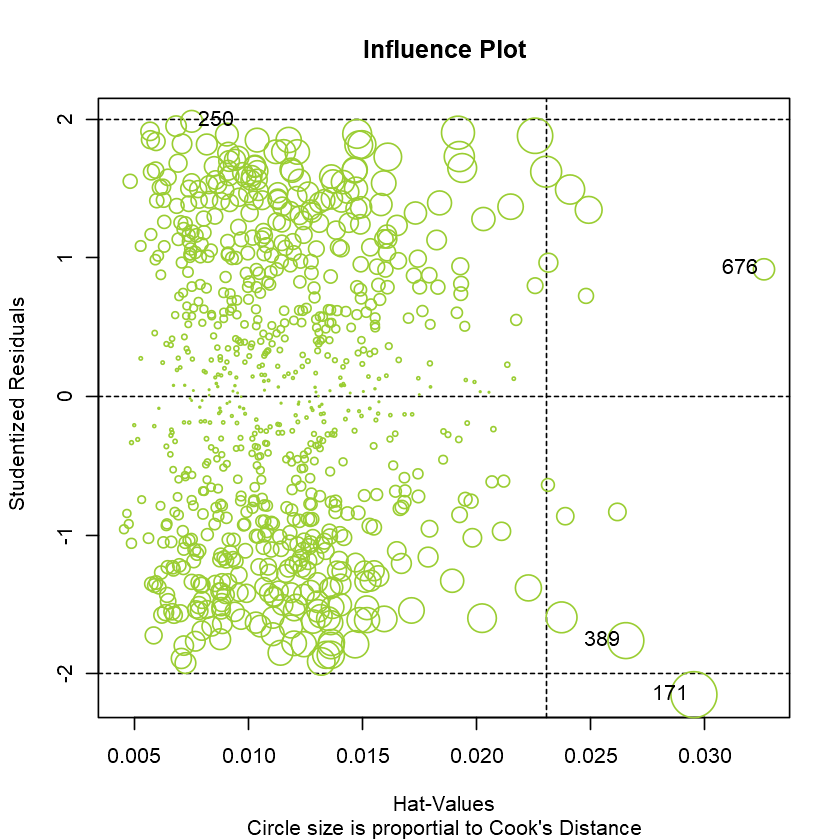

In [33]:
# Draw the Influence Plot
influencePlot(MLR_no_outlier, scale=5, 
              id.method="noteworthy", 
              main = "Influence Plot", 
              sub = "Circle size is proportial to Cook's Distance",
              col = "yellowgreen")

**Observation:** Compared to the Influence Plot in the Multiple Linear model with outlier, this chart has omitted the datapoints which are high leverage points are those that are farthest to the right. The remaining points have almost no big change compared to the previous chart.

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.1.3. Ridge Regression Model </strong></div>

Any data that exhibits multicollinearity can be analysed using the model tuning technique known as **Ridge regression**. This technique carries out L2 regularisation. Predicted values differ much from real values when the problem of multicollinearity arises, least-squares are unbiased, and variances are significant. We have the formula:

$$ L_{ridge} = argmin_{\hat{\beta}}( ||Y - \beta * X||^{2} + \lambda * ||\beta||_{2}^{2}) $$

where $\lambda$ is regularization penalty.

To train the Ridge model, we follow these parameters in `train()` function:
- Using the response variable like linear regression with the data.set.
- Using `ridge` to define the method we use.
- Centering and scaling are the important step in pre-processing before modeling. 
- Cross validation applied to this model via the variable `trControl`. 
- To tune the Ridge model, we can give the model different lambda values. `Caret` method will retrain the model with different lambdas by using `expand.grid()` function and choose the best version for the final model. 

In [34]:
# Tuning lambda parameter
lambda <- expand.grid(
  .lambda = seq(0, 0.5, by = 0.02)
)

# Training Ridge model with best lambda and using Cross validation
Ridge_model <- train(
  amount_paid ~ .,
  data = train.set,
  method = 'ridge',
  preProcess = c("center", "scale"),
  trControl = cv,
  tuneGrid = lambda
)

Create 2 plots, one plot to show for each lambda, how the error will change, the other plot will be sorted in descending order of importance of the factors.

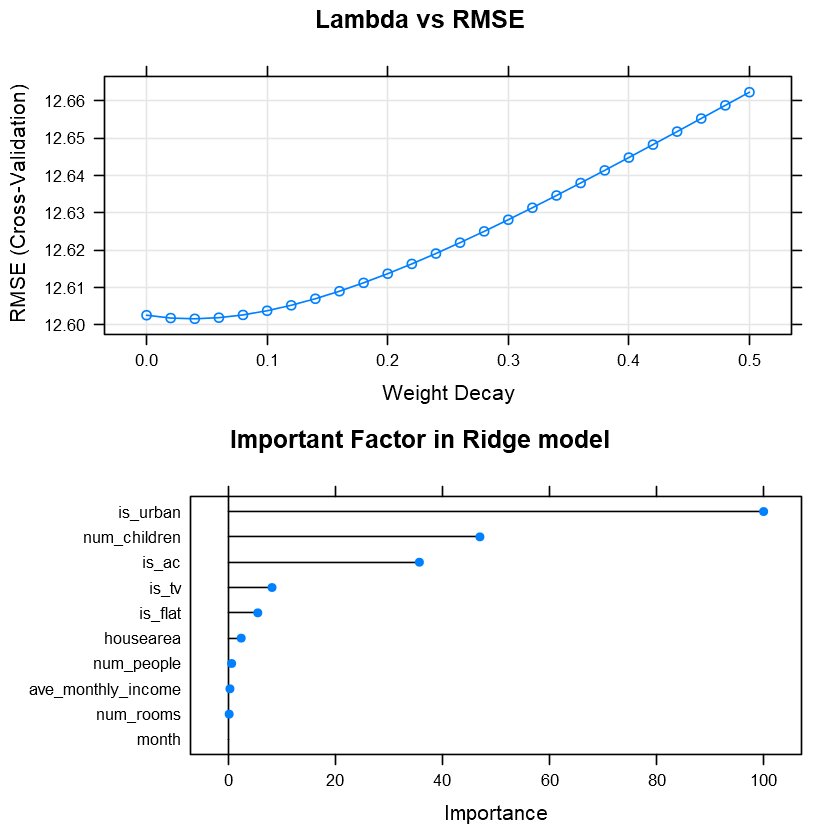

In [35]:
f1 <- plot(Ridge_model, main = "Lambda vs RMSE")
f2 <- plot(varImp(Ridge_model), main = "Important Factor in Ridge model")
grid.arrange(f1, f2, ncol = 1)

**Observation:**
- For the first graph, we can see that when the lambda runs from 0 to about 0.04, the error reaches its minimum value at around 12.6 and then increases continuously as the lambda increases. So the model will automatically choose the optimal lambda value.
- For the second chart, on a 100-point scale, the variable `is_urban` is almost maximal, followed by the variable `num_children` with only half the importance of the highest variable, about 50 points, followed by `is_ac` with less than 40 points. In contrast, all the remaining factors are of very low importance and account for less than 10 points.

Let's check which lambda value is best by printing model information.

In [36]:
Ridge_model

Ridge Regression 

800 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   MAE     
  0.00    12.60259  0.8805086  10.76126
  0.02    12.60183  0.8805150  10.76063
  0.04    12.60163  0.8805148  10.76001
  0.06    12.60193  0.8805086  10.75943
  0.08    12.60266  0.8804972  10.75945
  0.10    12.60378  0.8804809  10.75969
  0.12    12.60524  0.8804605  10.75991
  0.14    12.60700  0.8804362  10.76033
  0.16    12.60902  0.8804086  10.76125
  0.18    12.61126  0.8803780  10.76247
  0.20    12.61371  0.8803447  10.76416
  0.22    12.61634  0.8803090  10.76590
  0.24    12.61911  0.8802712  10.76757
  0.26    12.62202  0.8802316  10.76958
  0.28    12.62505  0.8801903  10.77171
  0.30    12.62817  0.8801476  10.77376
  0.32    12.63138  0.8801036  10.77575
  0.34    12.63466  0.8800584  10.77773
  0.3

**Observation:** After verifying the model running through the lambda loops, it is concluded that when the lambda is 0.04 it will be the optimal value for the RMSE and MAE errors to be the smallest and the Rsquared to be the highest (i.e. 12.60163, 10.76001 and 0.8805148, respectively)

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.1.4. Lasso Regression Model</strong></div>

Lasso regression is a model that improves on linear regression to address multicolinearity-related problems. A shrinkage parameter is added by the optimisation function in Lasso, allowing for the removal of features from the final model. We have the formula: 

$$ L_{lasso} = argmin_{\hat{\beta}}( ||Y - \beta * X||^{2} + \lambda * ||\beta||_{1}) $$


To train the Lasso model, we follow these parameters in `train()` function:
- Using the response variable like linear regression with the data.set.
- Using `lasso` to define the method we use.
- Centering and scaling are the important step in pre-processing before modeling. 
- Cross validation applied to this model via the variable `trControl`. 
- Unlike Ridge model, in order to tune the Lasso model, we can give the model different fraction parameters which will control how strong the shrinkage works. `Caret` method will retrain the model with different fractions by using `expand.grid()` function and choose the best version for the final model. 

In [37]:
# Tuning fraction parameter
frac <- expand.grid(
  .fraction = seq(0, 1, by = 0.1)
)

# Training Ridge model with best fraction and using Cross validation
Lasso_model <- train(
  amount_paid ~ .,
  data = train.set,
  method = 'lasso',
  preProcess = c("center", "scale"),
  trControl = cv,
  tuneGrid = frac
)

Create 2 plots, one plot to show for each fraction, how the error will change, the other plot will be sorted in descending order of importance of the factors.

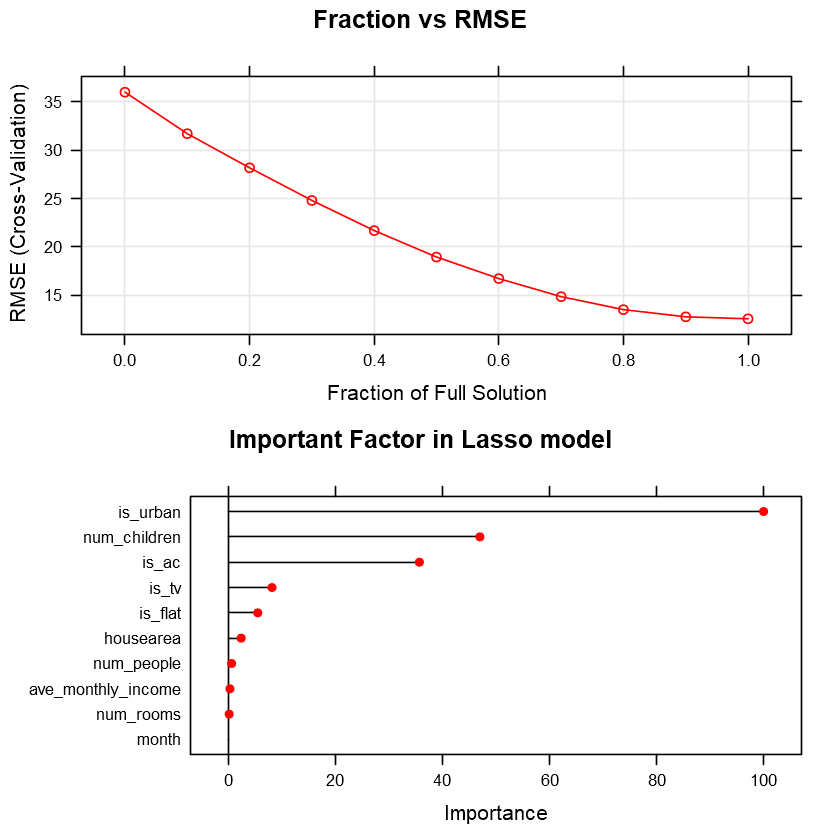

In [38]:
f1 <- plot(Lasso_model, col='red', main = "Fraction vs RMSE")
f2 <- plot(varImp(Lasso_model), col = 'red', main = "Important Factor in Lasso model")
grid.arrange(f1, f2, ncol = 1)

**Observation:**
- For the first graph, we can see that when the fraction runs from 0 to 1, the error decreases continuously and reaches its minimum value at around under 15 at fraction equal 1. So the model will automatically choose the optimal fraction value.
- For the second chart, this result is hardly different from Ridge model,on a 100-point scale, the variable is_urban is almost maximal, followed by the variable `num_children` and `is_ac` with only half the importance of the highest variable. In contrast, all the remaining factors are of very low importance and account for less than 10 points.

Let's check which fraction value is best by printing model information.

In [39]:
Lasso_model

The lasso 

800 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.0       36.00727        NaN  29.37375
  0.1       31.71695  0.4332723  25.71368
  0.2       28.18785  0.6473094  22.95817
  0.3       24.81225  0.7550217  20.31677
  0.4       21.69388  0.7977202  17.82624
  0.5       18.95975  0.8153023  15.64346
  0.6       16.73083  0.8404015  13.84387
  0.7       14.86011  0.8609437  12.39782
  0.8       13.51982  0.8712196  11.37807
  0.9       12.77803  0.8778120  10.88464
  1.0       12.57476  0.8796088  10.73445

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 1.

**Observation**: After verifying the model running through the fraction loops, it is concluded that when the fraction is 1.0 it will be the optimal value for the RMSE and MAE errors to be the smallest and the Rsquared to be the highest (i.e. 12.57476, 10.73445 and 0.8796088, respectively)

### 4.2. Nonlinear models <a class="anchor" id="sec_4.2"></a>

The general polynomial regression model has form:

$$ Y = β_0 + β_1 x + β_2 x^2 + · · · + β_n x^n + ϵ $$

where $n^{th}$ is degree polynomial and $ϵ$ is an error term.

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.2.1. Polynomial Model</strong></div>

To build a polynomial model, use the `lm()` function to train the model combined with `polym()` with a degree of 3 to run. Note that based on the significant code, we only choose high impact variables for model training.\
Since the results returned are very long, using the `glance()` function helps in creating a single row summary.

In [40]:
Poly_model <− lm(amount_paid ~ polym(num_people, housearea, is_ac, 
                                     is_tv, is_flat, ave_monthly_income,
                                     num_children, is_urban, degree=3, raw=TRUE),
                data = train.set)

glance(Poly_model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8996649,0.8805249,12.48006,47.00459,2.421838e-264,129,-3084.119,6428.239,7037.238,104509.5,671


**Observation:**
- The p-value with 2.421838e-26, very small show that these variable has the closest linear relationship with the response variable `amount_paid`.
- R-squared is around 89.96% and adjust R-squared is 88.05%. This illustrates the multiple correlation between the predictor and response variables.
- AIC's main goal is to discourage the addition of new variables to a model. When more words are included, it raises the penalty and the mistake. The model is better the lower the AIC (6428.239 for this model).
- AIC's variation known as BIC (or Bayesian information criteria) has a greater penalty for adding more variables to the model.

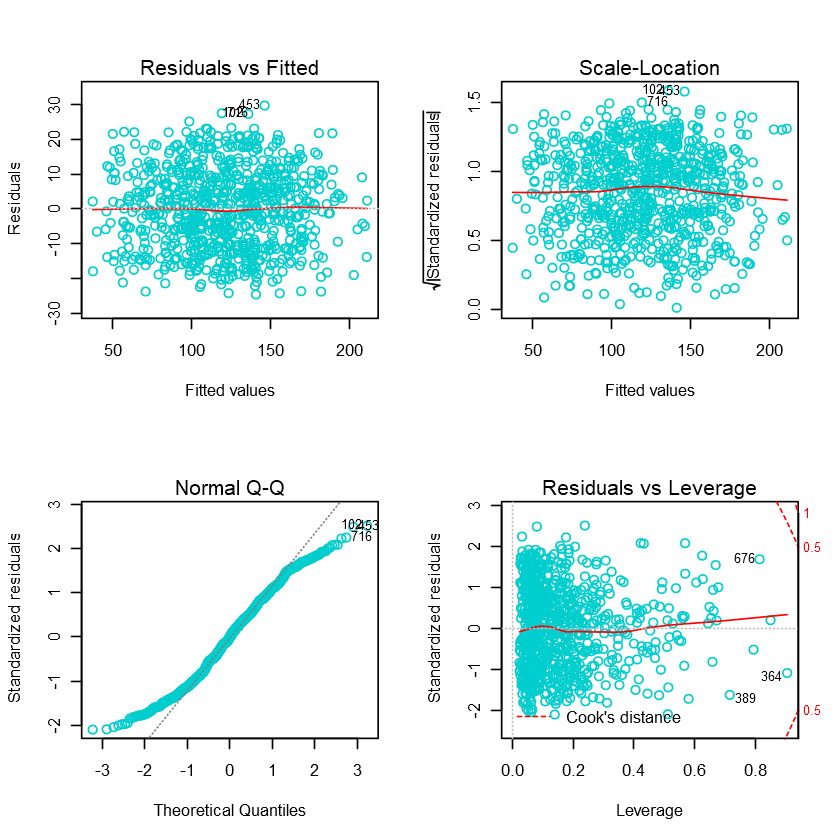

In [41]:
par(mfcol = c(2,2))
plot(Poly_model, col = 'cyan3')

**Observation:** 
- <u>For Residuals vs Fitted</u>: there is an even distribution of the datapoints on the linear line, but there is still quite a large concentration in the middle, also shows that there could be a non-linear relationship between `amount_paid` and all the predictors.
- <u>For Scale-Location</u>: there is a random spread around the red line of the datapoints, which proves it's good.
- <u>For Normal Q-Q</u>: It is good if residuals are lined well on the straight dashed line. In this case, the data points are concentrated in the range -1.5 to 1.5, beyond this range, they are increasing and deviating from the dashed line
- <u>For Residual vs Leverage</u>: there are relatively outliers outside of the -2 and 2 zones and there are many high leverage points are those that are farthest to the righ. If these data with high leverage and significant residuals are impaired, the model may be perturbed (the model may be perturbed), becoming less accurate.

### 4.3. Tree-based Models <a class="anchor" id="sec_4.3"></a>

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.3.1. Decision Tree Regression Model </strong></div>

Binary recursive partitioning is an iterative procedure that divides the data into partitions or branches, and then continues to divide each partition into smaller groups as the algorithm progresses up each branch. This process creates a **regression tree**.

To train the Regression tree model, we follow these parameters in train() function:

- Using the response variable with the data.set.
- Using `rpart` to define the method we use.
- Centering and scaling are the important step in pre-processing before modeling.
- Cross validation applied to this model via the variable trControl.
- Set the tuneLength or the number of leaf in the tree is 7. The Complexity parameter will be generated based on these tuneLength.
- Using metric 'RMSE'.

In [42]:
# Training regression tree model with Cross validation and tuneLength is 7
DT_model <- train(
    amount_paid ~ ., 
    data = train.set, 
    method = "rpart",
    preProcess = c("center", "scale"),
    trControl = cv,
    tuneLength = 7,
    metric = "RMSE"
)

print(DT_model)

CART 

800 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.02486177  17.88472  0.7512177  14.40800
  0.03547063  19.41686  0.7114179  15.71145
  0.03929327  20.71374  0.6739642  16.77078
  0.06065894  21.68589  0.6368510  17.50882
  0.06649234  23.66752  0.5726174  19.31631
  0.12336135  26.72869  0.4528314  21.72855
  0.42163673  32.36072  0.3831949  26.39954

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.02486177.


Now, pruning the model with the value of the Complexity parameter from 0 to 0.1 with step 0.01 to create a new model.

In [43]:
DT_model2 <- train(
    amount_paid ~ ., 
    data = train.set, 
    method = "rpart",
    tuneGrid = expand.grid(cp = seq(from = 0, to = 0.1, by = 0.01)),
    trControl = cv,
    metric = "RMSE"
)
print(DT_model2)

CART 

800 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.00  15.44673  0.8175818  12.50196
  0.01  16.45069  0.7923592  13.51194
  0.02  17.76826  0.7567860  14.46864
  0.03  18.43802  0.7381249  14.90569
  0.04  20.67992  0.6725946  16.74092
  0.05  20.91570  0.6660777  16.97121
  0.06  21.86061  0.6326008  17.77857
  0.07  24.28039  0.5505631  19.57465
  0.08  24.36459  0.5464576  19.67655
  0.09  24.36459  0.5464576  19.67655
  0.10  24.36459  0.5464576  19.67655

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.


Draw a graph to compare the two models above, one for the Unprune tree and the other for the Prune tree, represent the Complexity Parameter with RMSE, and also the plot show descending order of importance of the factors.

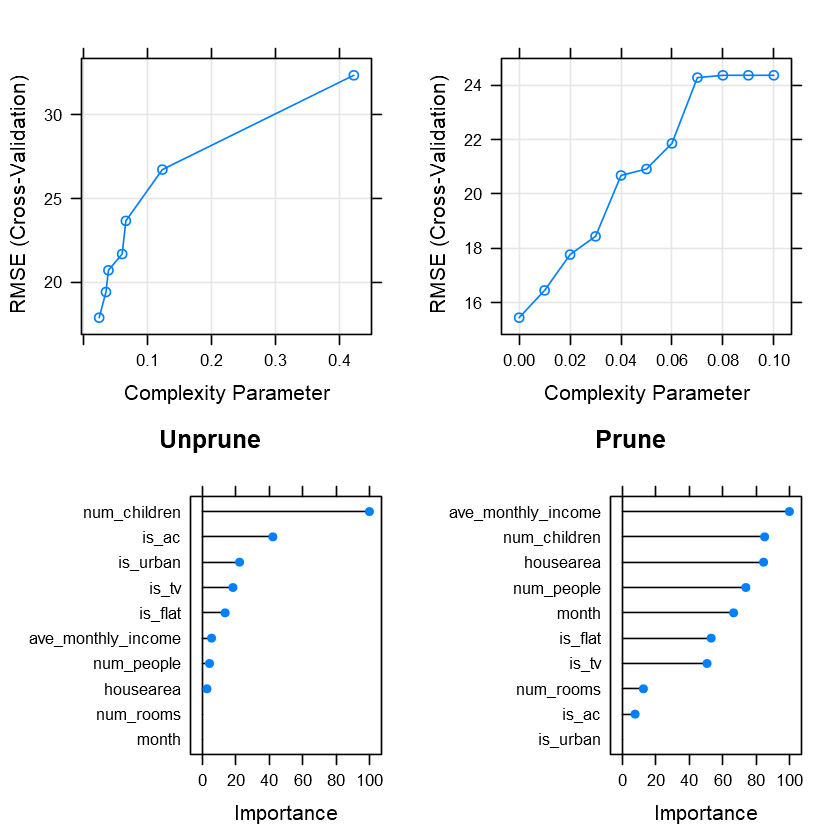

In [44]:
f1 <- plot(DT_model)
f2 <- plot(DT_model2)
f3 <- plot(varImp(DT_model), main = "Unprune")
f4 <- plot(varImp(DT_model2), main = "Prune")
grid.arrange(f1, f2, f3, f4, nrow = 2)

**Observation:**\
For the Unprune model, the Complexity Parameter to optimize the error is 0.0248, while for the Prune model it is 0. However when looking at the Important Factor, Unprune shows the correct order as we analyzed in the EDA section about the  correlation of predictor and response variable, conversely, for the order in the Prune tree seems to be incorrect, these factors are ranked wrongly in accordance with the above analysis.

**Conclusion:** In this case, the unprune regression tree model gives a better result so I will choose this model over the Prune model.

Let's show selected models as a tree using `rpart.plot()` method to see how they work:

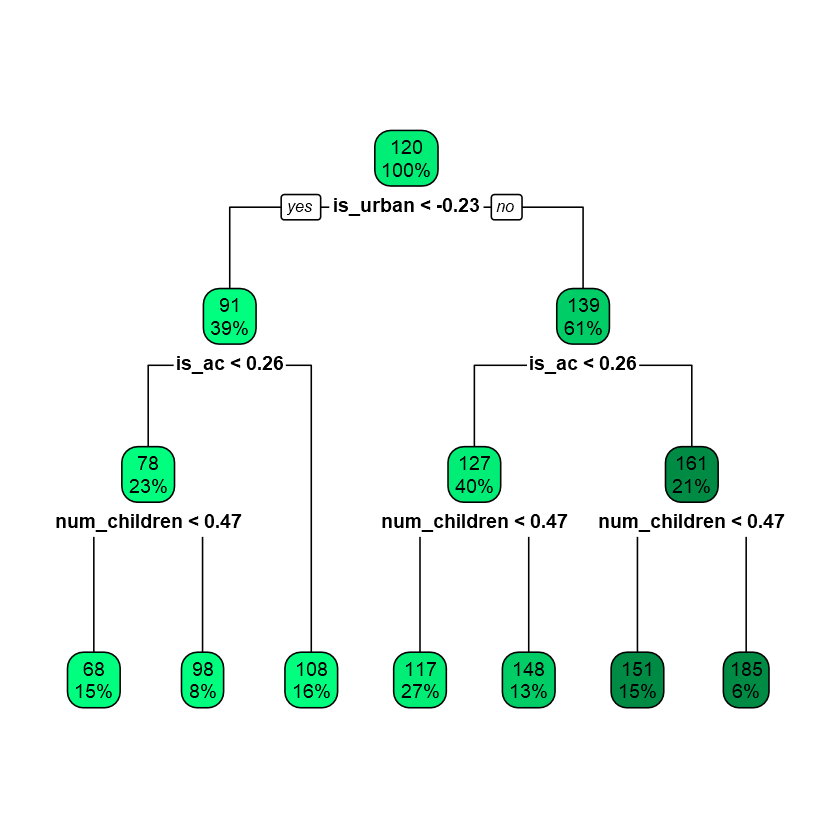

In [45]:
rpart.plot(DT_model$finalModel, box.palette = c("springgreen", "springgreen1", "springgreen2", "springgreen3", "springgreen4"))

**Observation:**
- The tree is divided based on binary split, and ordered from root to leaf in order of importance of predictor variables.
- The depth and number of leaves will be customized according to the requirements of the topic.
- For each node, a percentage will be attached when dividing the tree.

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>4.3.2. Boosted Regression Tree Model </strong></div>

Regression frequently uses boosted trees. They are an ensemble technique like to bagging, except they construct trees one at a time rather than in tandem. They built a new tree by fixing the existing one after using the prior tree to identify errors. GBM always runs a new model, predicts the residuals of the previous model, and adds the results to create a new composite. Each subsequent iteration of the model improves accuracy and reliability. Contiguous trees are usually designed to slow down the learning rate. By reducing the size of individual trees and leaves, future trees can have a greater influence on the model.

$$ F_{M}(x) = f_{0} + \eta \sum_{m=1}^{M}{f_{m}(x)} $$

To train the Boosted Regression tree model, we follow these parameters in train() function:

- Using the response variable with the data.set.
- Using `gbm` to define the method we use.
- Centering and scaling are the important step in pre-processing before modeling.
- Cross validation applied to this model via the variable trControl.
- Set the tuning hyperparameters as follow:
    - n.trees is number of boosting iterations ($M$).
    - interaction.depth is the maximum depth of the tree.
    - shrinkage is learning rate ($\eta$).
    - n.minobsinnode is minimum terminal node size.

In [46]:
# Tuning the hyperparameters
tuning <- expand.grid(
    n.trees = c(50, 100, 150, 200, 500),
    interaction.depth = c(1, 2, 3),
    shrinkage = 0.1,
    n.minobsinnode = 10
)

# Training Boosted Tree model
BT_model <- train(
    amount_paid ~ .,
    data = train.set,
    method = 'gbm',
    preProcess = c("center", "scale"),
    trControl = cv,
    tuneGrid = tuning,
    verbose = FALSE
)
BT_model

Stochastic Gradient Boosting 

800 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      16.51628  0.8418375  13.62269
  1                  100      13.38249  0.8723074  11.24991
  1                  150      12.83984  0.8759214  10.89298
  1                  200      12.74929  0.8761588  10.79030
  1                  500      13.01071  0.8707226  11.01550
  2                   50      14.12275  0.8627179  11.80046
  2                  100      13.00437  0.8715812  10.97680
  2                  150      13.03465  0.8701212  11.02385
  2                  200      13.20165  0.8668059  11.16050
  2                  500      13.73387  0.8563762  11.58203
  3                   50      13.30763  0.8720026  11.15670
  3                  100      13.

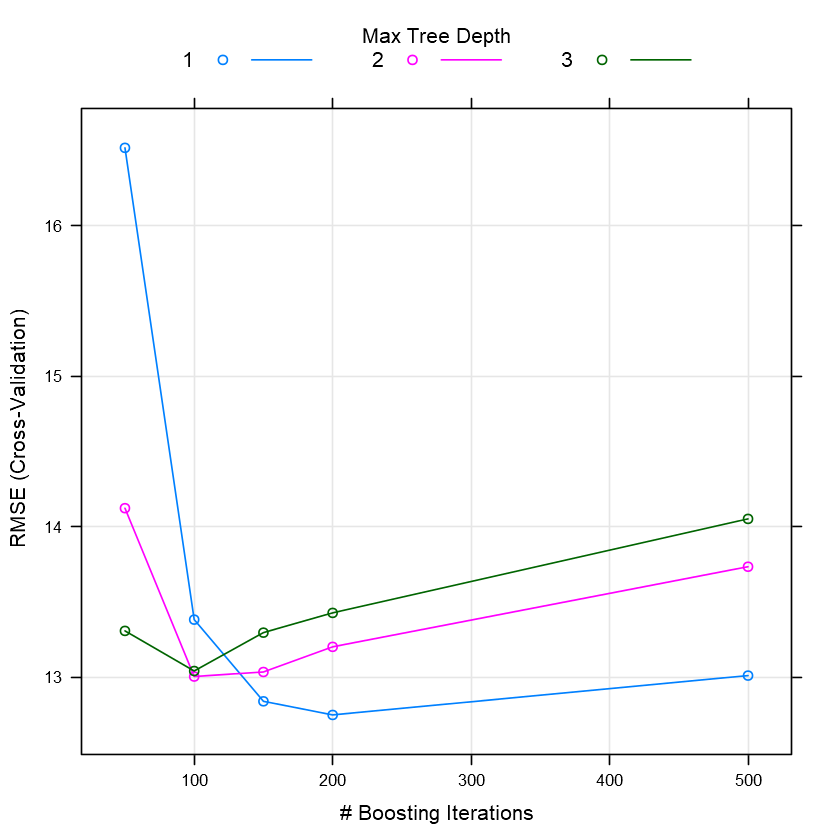

In [47]:
plot(BT_model)

**Observation:**
- After tuning the hyperparameters and train the model, the final values used for the model were n.trees is 200, interaction.depth is 1, shrinkage is 0.1 and n.minobsinnode is 10.
- Looking at the chart, we see that the blue line (ie the tree depth equal 1) reaches the minimum error when Boosting Iteration (ntree) is at 200, then tends to increase slightly. Although at position ntree equal 100, the pink line (tree depth is 2) has the lowest error, but when running up to ntree 200, using depth equal 1 is the most optimal.

,var,rel.inf
is_urban,is_urban,46.49902711
num_children,num_children,23.57382860
is_ac,is_ac,20.73154610
is_tv,is_tv,3.47050335
is_flat,is_flat,3.06022075
ave_monthly_income,ave_monthly_income,0.97770726
housearea,housearea,0.83922512
num_people,num_people,0.77266638
month,month,0.07527531
num_rooms,num_rooms,0.00000000


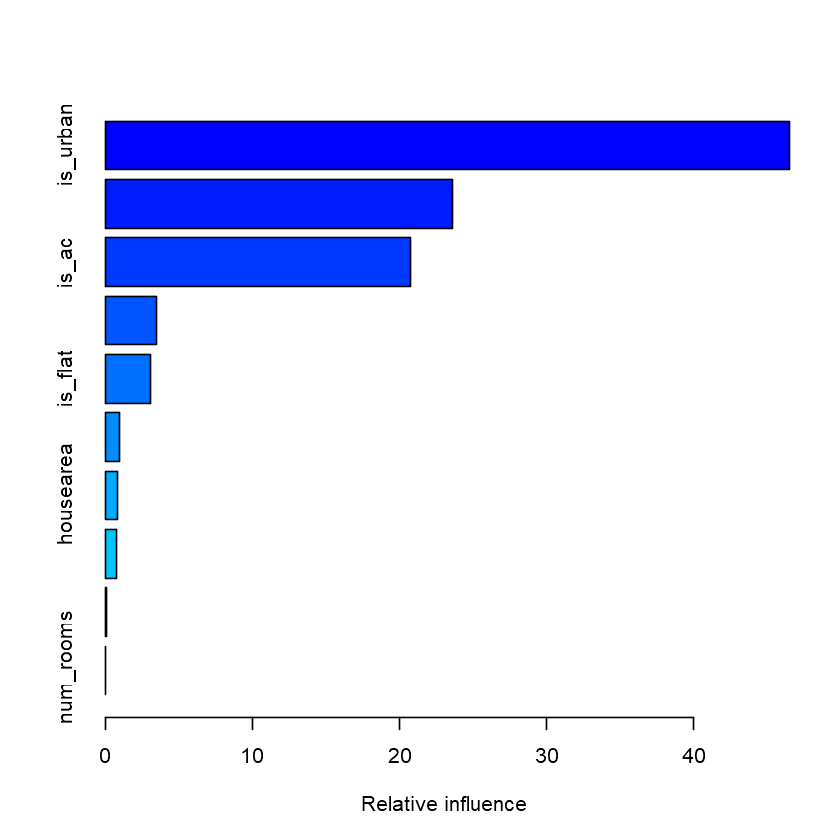

In [48]:
summary(BT_model)

**Observation:** Similarly, when comparing the importance of factors, we can see that the variable `is_urban` has the highest percentage, followed by `num_children` and `is_ac`. The remaining factors do not account for a high percentage.

### 4.4. Model Comparison & Evaluation <a class="anchor" id="sec_4.4"></a>

First, graph to see the relationship between predicted and actual values by using `plot_actual_pred()` function which define above.

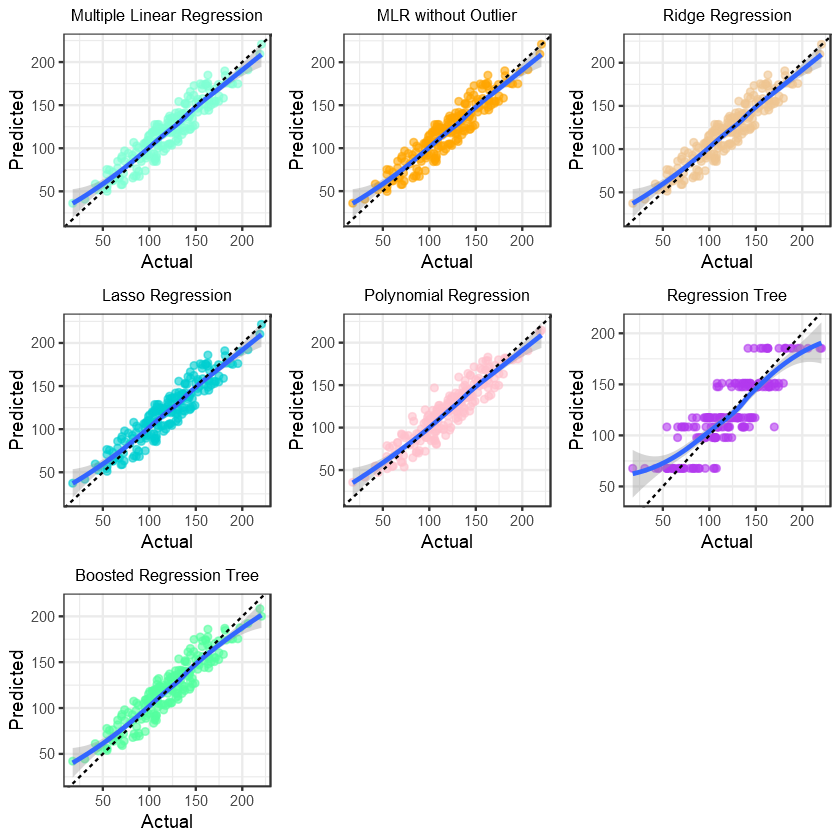

In [49]:
f1 <- plot_actual_pred(MLR_step, train.label, test.data, test.label, "aquamarine1", "Multiple Linear Regression")
f2 <- plot_actual_pred(MLR_no_outlier, train.label, test.data, test.label, "orange", "MLR without Outlier")
f3 <- plot_actual_pred(Ridge_model, train.label, test.data, test.label, "burlywood2", "Ridge Regression")
f4 <- plot_actual_pred(Lasso_model, train.label, test.data, test.label, "darkturquoise", "Lasso Regression")
f5 <- plot_actual_pred(Poly_model, train.label, test.data, test.label, "pink", "Polynomial Regression")
f6 <- plot_actual_pred(DT_model, train.label, test.data, test.label, "darkorchid2", "Regression Tree")
f7 <- plot_actual_pred(BT_model, train.label, test.data, test.label, "seagreen1", "Boosted Regression Tree")

grid.arrange(f1, f2, f3, f4, f5, f6, f7, nrow = 3)

**Observation:** We can observe:
- Linear and Non-linear models (first 5 models) show good results, the model has high accuracy, there is a strong correlation between the model's predictions and its actual results.
- On the other hand, tree-based models seem to perform worse. Especially for the regression tree model, where the data points are far from the projected regression line, it can be said that this model performs the worst.

For better comparison, let's use evaluation metrics with `evaluation()` function which built above to see how well your model is performing and how closely your forecast matches the actual value through error functions. Let's first create a dataframe with the column being the test error values and the row being the model. Then appending in each row the result of evaluation function.

In [50]:
columns <- c("R-Squared", "MSE", "RMSE", "MAE") 
rows <- c("Multiple Linear Regression", "Multiple Linear Regression without Outlier",
          "Ridge Regression", "Lasso Regression", 
          "Polynomial Regression", "Decision Tree Regression", "Boosted Regression Tree")

# Create a dataframe to store the test error in each model 
df <- data.frame(matrix(nrow = length(rows), ncol = length(columns))) 
colnames(df) <- columns
rownames(df) <- rows

In [51]:
# Append to each row the list of test error
df[1,] <- evaluation(MLR_step, test.data, test.label)
df[2,] <- evaluation(MLR_no_outlier, test.data, test.label)
df[3,] <- evaluation(Ridge_model, test.data, test.label)
df[4,] <- evaluation(Lasso_model, test.data, test.label)
df[5,] <- evaluation(Poly_model, test.data, test.label)
df[6,] <- evaluation(DT_model, test.data, test.label)
df[7,] <- evaluation(BT_model, test.data, test.label)

df

,R-Squared,MSE,RMSE,MAE
Multiple Linear Regression,0.8741740,172.0090,13.11522,11.34796
Multiple Linear Regression without Outlier,0.8739555,172.3076,13.12660,11.36518
Ridge Regression,0.8741460,172.0473,13.11668,11.38991
Lasso Regression,0.8736867,172.6751,13.14059,11.40499
Polynomial Regression,0.8610361,189.9690,13.78292,11.49538
Decision Tree Regression,0.7072450,400.2073,20.00518,16.04022
Boosted Regression Tree,0.8713665,175.8469,13.26073,11.48414


**Observation:** We can observe the following:
- For R-Squared and other errors, Linear regression models will have not much different numbers, but the most prominent is the multiple linear regression model with the highest R-Squared and lowest Test errors. (specifically, 0.8741740 for R-Squared, 172.0090 for MSE, 13.11522 for RMSE and 11.34796 for MAE).
- In addition, the non-linear (polynomial) and Boosted regression tree models also show that these are good models with numbers not much different from the above linear model. In which, boosted tree has better numbers than the others.
- Finally, Decision Tree Regression seems to be the most unsuitable model for the continuous-value prediction problem. This model has the lowest R-Squared index with only 0.62 compared to nearly 0.87 in other models, and the highest error function with nearly 22.73 compared to just under 14 for the rest of the models.

**Conclusion:** Multiple linear regression is the model with the highest accuracy, so I will use this model for the final prediction.

## 5. Results and discussion <a class="anchor" id="sec_5"></a>

### 5.1. Prediction Task <a class="anchor" id="sec_5.1"></a>

Using Multiple Linear Regression with `MLR_step` model to predict the monthly electricity bill

In [52]:
final_predict = predict(MLR_step, test.data)
head(final_predict)

801       802       803       804       805       806 
119.40319 132.13620  65.48379  92.00304 109.26446 104.23018

In [53]:
# Create dataframe to store actual and predicted value from row 800 to 1000 in data 
final_df <- data.frame(Actual = test.label, Predicted = final_predict)
head(final_df,10)

,Actual,Predicted
801,124.9572,119.40319
802,133.6862,132.13620
803,82.2438,65.48379
804,81.7521,92.00304
805,98.1271,109.26446
806,100.7145,104.23018
807,101.9439,93.99463
808,86.4271,76.14050
809,54.6292,55.63343
810,141.3174,136.83695


### 5.2. Inference Task <a class="anchor" id="sec_5.2"></a>

To see which factors are the key factors that strongly affect the monthly electricity bill, use `varImp()` method to track the changes in model statistics. In here, we use the `MLR_model`, which is still keep all factor to see their score. Then store them into a dataframe sorted in descending order.

In [54]:
important <- data.frame(varImp(MLR_model))
important <- data.frame(factor = rownames(important), 
                        overall = important$Overall)
important[order(important$overall, decreasing = TRUE),]

,factor,overall
9,is_urban,54.9944896
8,num_children,37.6271674
4,is_ac,36.3774274
5,is_tv,13.0080493
6,is_flat,12.8379046
2,num_people,4.1835770
7,ave_monthly_income,3.7662372
3,housearea,1.7703306
10,month,1.0349580
1,num_rooms,0.4390814


**Observation:**
- Combining from the correlation chart from section 2.3 and the dataframe above, there are 5 factors with weighted averages of the model coefficients over 10. The highest of which is the `is_urban` attribute with a number close to 55, followed by `num_children` and `is_ac` with 37.62 and 36.37, respectively. Next, the two variables `is_tv` and `is_flat` also accounted for a similar proportion recorded at 13 and 12.83, respectively.
- In contrast, the 5 factors with weighted averages of the model coefficients lower than 10 are those that do not have much impact on the model nor have a correlation to the response variable `amount_paid`. Specifically, the numbers for `num_people` and `ave_monthly_income` ranged only between 4.18 and 3.76, for `houseare`, `month` and `num_rooms` were recorded at around 1.77, 1.03 and 0.43, respectively, very small numbers when compared to `is_urban`.

**Conclusion:** `is_urban` is the most important variable. 

We can interpret as follows, for houses located in urban areas, it will be the main factor affecting the monthly electricity bill, which can be mentioned for a number of reasons such as high demand for electricity, most household appliances need electricity to operate (refrigerator, washing machine, oven, etc), small living space makes the use of cooling devices work continuously.

Next, the number of children in the family and whether there is an air conditioner in the house also has a significant impact on the amount of electricity each month. Specifically, if the number of children is higher and there is an air conditioner in the house, it is inevitable that taking care, washing clothes, cooking and having to turn on the air conditioner continuously. In addition, on summer days, it is hot and sunny, which is also the time when students are on summer vacation, most of the time used and the number of devices consuming electricity increases compared to normal days. 

In addition, if the house has a TV and the house is an apartment, it also contributes to the increase in electricity bills each month. But the surprise from the process of predicting that the number of people living in the house and their monthly income did not have much effect on the electricity bill, which proves whether the number of people living in the house is high or the monthly income is high, the awareness of saving electricity will be the main factor determining the amount of electricity used each month.

With the above arguments, it is not difficult to see that the area of ​​the house, the number of rooms in the house or in any time, these factors do not affect the amount paid per month at all. Because even though the house is large, the house does not have a TV or air conditioner, the house has few children or the location of the house is located in the countryside, the demand for electricity is very little.

### 5.3. Discussion <a class="anchor" id="sec_5.2"></a>

- For the appearance of negative and zero values in 3 columns `num_rooms`, `num_people` and `ave_monthly_income`, we replace them with the median of the column.
- Outliers in some columns will be preserved because their number is small and mainly located in factors that have little impact on the model. However, I still build the model without outlier to see the difference between them.
- Testing multiple models will give a more general view of whether which model works best in the situation of the problem, for example, for a response variable with continuous values, using the model linear or non-linear regression will yield better results, for a tree-based model will be more suitable for classification problem.
- For each type of regression or classification problem, there will be different evaluations, specifically in order to evaluate Regression models, using metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R² (R-Squared).
- Making comments and inferences from the model results is an extremely important part of the prediction problem, this assignment has done well in relying on the data and make inferences appropriate to the actual situation.

## 6. Conclusion<a class="anchor" id="sec_6"></a>

In this assignment, we are acquainted with the task of predicting data in real problems, including the steps of analysis to explore the data, understand its meaning and relationships. From there, list and deploy models for regression problems. Then compare the performance of each model as well as evaluate how good they are. Choose the best model for the final prediction. 

For the Inference task, from the trained model, it is possible to extract variables that affect the model in particular and the electricity bill in general. From there, it is possible to detect which variable has the most influence, and at the same time, analyze and make a decision in practice why the variables have such influence based on the data provided by the model.

Throughout the assignment, the R language is used for analysis and prediction. The support libraries are optional to use, especially when training models, the `caret()` library is applied to most models and when plotting, the `ggplot()` library is applied to most of the models to draw all graphs.

## 7. References <a class="anchor" id="sec_8"></a>

- Shaun Turney. (2022). Pearson Correlation Coefficient (r) | Guide & Examples. Available: https://www.scribbr.com/statistics/pearson-correlation-coefficient/. Accessed: 2/9/2022


- STHDA. Visualize correlation matrix using correlogram. Available: http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram. Accessed: 2/9/2022


- ggplot2. Smoothed conditional means. Available: https://ggplot2.tidyverse.org/reference/geom_smooth.html. Accessed: 2/9/2022


- Songhao Wu. (2020). 3 Best metrics to evaluate Regression Model?. Available: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b. Accessed: 12/9/2022


- Joachim Schork. (2022). Plot Predicted vs. Actual Values in R. Availabel: https://statisticsglobe.com/plot-predicted-vs-actual-values-in-r. Accessed: 12/9/2022


- Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. (2021). An Introduction to Statistical Learning (2nd Ed)


- Mark Hoffman. Introduction to Computational Social Science. Availabel: https://bookdown.org/markhoff/css/. Accessed: 13/9/2022


- Paul Teetor. (2011). R Cookbook. Section 11.7 (1st Ed)


- Christian Thieme. (2021). Understanding Linear Regression Output in R. Availabel: https://towardsdatascience.com/understanding-linear-regression-output-in-r-7a9cbda948b3. Accessed: 15/9/2022


- Aayush Bajaj. (2022). Performance Metrics in Machine Learning. Availabel: https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide. Accessed: 15/9/2022


- Lasso vs Ridge vs Elastic Net | ML. (2022). Available: https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/. Accessed: 18/9/2022